<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/BuySell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing needed libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [13]:
stock_price_df = pd.read_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')
#print(stock_price_df['AMZN'].head())
#print(stock_price_df['AMZN'].tail())


df = pd.DataFrame()
df['AMZN'] = stock_price_df['AMZN'].values
df = df.dropna()
df

,AMZN
0,753.669983
1,757.179993
2,780.450012
3,795.989990
4,796.919983
...,...
1071,3279.389893
1072,3299.300049
1073,3372.199951
1074,3379.389893


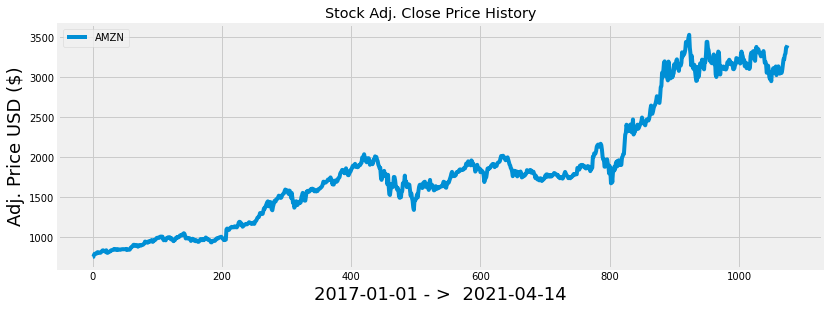

In [16]:
# Visually Show The Stock/Portfolio Price(s)
# Create the title 
title = 'Stock Adj. Close Price History    '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
plt.title(title)
plt.xlabel('2017-01-01 - >  2021-04-14',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [17]:
#Create the 30 day simple moving average
SMA30 = df.rolling(window=30).mean()
SMA30

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3092.361003
1072,3097.020003
1073,3107.521338
1074,3117.070003


In [18]:
#Create the 100 day simple moving average
SMA100 = df.rolling(window=100).mean()
SMA100

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3173.561089
1072,3175.180190
1073,3177.799390
1074,3180.305188


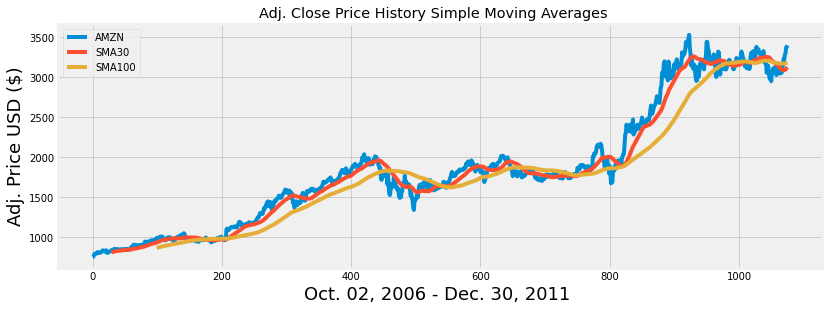

In [21]:
# Visually Show The Stock and The Moving Averages
# Create the title 
title = 'Adj. Close Price History Simple Moving Averages   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['AMZN'],  label='AMZN')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( SMA30['AMZN'],  label='SMA30')
plt.plot( SMA100['AMZN'],  label='SMA100')
  
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011 ',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [26]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
      if signal['SMA30'][i] > signal['SMA100'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['AMZN'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA30'][i] < signal['SMA100'][i]:
        if flag != 0:
          sigPriceSell.append(signal['AMZN'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [27]:
#Create a new dataframe
signal = pd.DataFrame(index=df['AMZN'].index)
signal['AMZN'] = df['AMZN']
signal['SMA30'] = SMA30['AMZN']
signal['SMA100'] = SMA100['AMZN']

In [28]:
signal

,AMZN,SMA30,SMA100
0,753.669983,NaN,NaN
1,757.179993,NaN,NaN
2,780.450012,NaN,NaN
3,795.989990,NaN,NaN
4,796.919983,NaN,NaN
...,...,...,...
1071,3279.389893,3092.361003,3173.561089
1072,3299.300049,3097.020003,3175.180190
1073,3372.199951,3107.521338,3177.799390
1074,3379.389893,3117.070003,3180.305188


In [29]:
x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]

In [30]:
signal


,AMZN,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,753.669983,NaN,NaN,NaN,NaN
1,757.179993,NaN,NaN,NaN,NaN
2,780.450012,NaN,NaN,NaN,NaN
3,795.989990,NaN,NaN,NaN,NaN
4,796.919983,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1071,3279.389893,3092.361003,3173.561089,NaN,NaN
1072,3299.300049,3097.020003,3175.180190,NaN,NaN
1073,3372.199951,3107.521338,3177.799390,NaN,NaN
1074,3379.389893,3117.070003,3180.305188,NaN,NaN


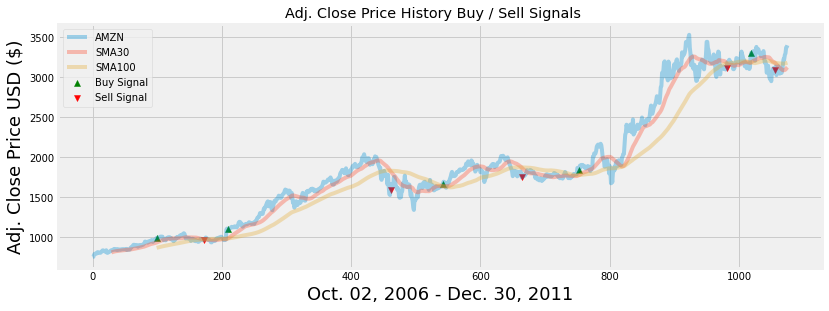

In [32]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Adj. Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = signal
ticker = 'AMZN'
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( my_stocks['SMA30'],  label='SMA30', alpha = 0.35)
plt.plot( my_stocks['SMA100'],  label='SMA100', alpha = 0.35)
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011',fontsize=18)
plt.ylabel('Adj. Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [34]:
def buy_and_sell(stock_price):
    max_profit_val, current_max_val = 0, 0 
    for price in reversed(stock_price):                       
        current_max_val = max(current_max_val, price)          
        potential_profit = current_max_val - price          
        max_profit_val = max(potential_profit, max_profit_val)

    return max_profit_val

print(buy_and_sell([8, 10, 7, 5, 7, 15]))
print(buy_and_sell([1, 2, 8, 1]))
print(buy_and_sell([]))

10
7
0
